<a href="https://colab.research.google.com/github/megboes/groves-research/blob/main/next_version_of_printing_rhombi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#combines 3 previous projects

import numpy as np
import matplotlib.pyplot as plt
import math

def adds_segment(x1,y1,x2,y2):
  # Plot the first line segment (from (x1,y1) to (x2,y2))
  ax.plot([x1, x2], [y1, y2],color='cyan', marker='o')
  ax.text(x1, y1, f'({x1},{y1})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
  ax.text(x2, y2, f'({x2},{y2})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)

#linear transformation from 3-space into 2-space
T1 = np.array([[math.sqrt(3)+3, math.sqrt(3)-3, -2*math.sqrt(3)],
              [math.sqrt(3)-3, math.sqrt(3)+3, -2*math.sqrt(3)]])
T = (1/6)*T1
print(T)

max_num_boxes=11

pi_0=[[]]
pi_1=[[[0,0,0]]]
pi_2=[[[0,0,0],[0,0,1]],[[0,0,0],[0,1,0]],[[0,0,0],[1,0,0]]]
master_pi=[pi_0,pi_1,pi_2]

def check_if_box_should_be_added(box, partition):
  we_should_add=True
  a,b,c=box
  if box in partition:
    we_should_add=False
  if (a>=1)and([a-1,b,c] in partition)==False:
    we_should_add=False
  if (b>=1)and([a,b-1,c] in partition)==False:
    we_should_add=False
  if (c>=1)and([a,b,c-1] in partition)==False:
    we_should_add=False
  return(we_should_add)

def given_single_partitions_produces_list_of_bigger_partitions(given_partition):
  some_partitions_of_more_boxes = []
  for element in given_partition:
    a,b,c=element
    candidate=[a+1,b,c]
    result=check_if_box_should_be_added(candidate,given_partition)
    if result==True:
      pi_plus = given_partition+[candidate]
      some_partitions_of_more_boxes.append(pi_plus)

  for element in given_partition:
    a,b,c=element
    candidate=[a,b+1,c]
    result=check_if_box_should_be_added(candidate,given_partition)
    if result==True:
      pi_plus = given_partition+[candidate]
      some_partitions_of_more_boxes.append(pi_plus)

  for element in given_partition:
    a,b,c=element
    candidate=[a,b,c+1]
    result=check_if_box_should_be_added(candidate,given_partition)
    if result==True:
      pi_plus = given_partition+[candidate]
      some_partitions_of_more_boxes.append(pi_plus)
  return(some_partitions_of_more_boxes)

def deletes_duplicates(collection_of_partitions):
  trial=collection_of_partitions
  for element in trial:
   number=trial.count(element)
   while number >=2:
     trial.remove(element)
     number=trial.count(element)
  collection_of_partitions=trial
  return(collection_of_partitions)

#NEXT we need to send individual partitions to get groved on.

#GOAL: given a single partition, count the groves on it.

def given_partition_determines_height(partition):
  #find size of space needed for grove
  height=0
  for box in partition:
    a,b,c=box
    height = max(height, a+b+c)
  height+=2
  return(height)

def given_partition_and_height_determines_initial_conditions(partition, height):
  #set everything in the space to 0
  initial_conditions = []

  for i in range(height):
    initial_conditions.append([])
    for j in range(height):
      initial_conditions[i].append([])
      for k in range(height):
        initial_conditions[i][j].append(0)
  # so now all coordinats have value of 0

  # here we make some coordinates equal to 1
  for box in partition:
    a,b,c=box
    if [a,b,c+1] not in partition:
      initial_conditions[a][b][c+1]=1
      initial_conditions[a][b+1][c+1]=1
      initial_conditions[a+1][b][c+1]=1
      initial_conditions[a+1][b+1][c+1]=1
    if [a,b+1,c] not in partition:
      initial_conditions[a][b+1][c]=1
      initial_conditions[a][b+1][c+1]=1
      initial_conditions[a+1][b+1][c]=1
      initial_conditions[a+1][b+1][c+1]=1
    if [a+1,b,c] not in partition:
      initial_conditions[a+1][b][c]=1
      initial_conditions[a+1][b][c+1]=1
      initial_conditions[a+1][b+1][c]=1
      initial_conditions[a+1][b+1][c+1]=1
    #mission complete!
  return(initial_conditions)

def given_initial_conditions_and_height_determines_remaining_values(conditions,height):
  ccr=conditions
  while ccr[0][0][0]==0:
    for i in range(height-1):
      for j in range(height-1):
        for k in range(height-1):
          if (ccr[i][j][k]==0) and (ccr[i+1][j][k]!=0) and (ccr[i][j+1][k]!=0) and (ccr[i][j][k+1]!=0):
            ccr[i][j][k]=(ccr[i+1][j][k]*ccr[i][j+1][k+1]+ccr[i][j+1][k]*ccr[i+1][j][k+1]+ccr[i][j][k+1]*ccr[i+1][j+1][k])/ccr[i+1][j+1][k+1]
  return(ccr)

def takes_in_a_partition_returns_number_of_groves(partition):
  test_partition=partition
  how_tall = given_partition_determines_height(test_partition)
  values=given_partition_and_height_determines_initial_conditions(test_partition, how_tall)
  final=given_initial_conditions_and_height_determines_remaining_values(values, how_tall)
  return(final[0][0][0])

################################### next block generates paritions up to max_num_boxes #################################3
#yeah, this should be it's own function
for i in range(2,max_num_boxes):
  for part in master_pi[i]:
      if len(master_pi)==i+1:
        master_pi.append(given_single_partitions_produces_list_of_bigger_partitions(part))
      elif len(master_pi)==i+2:
        master_pi[i+1]+=given_single_partitions_produces_list_of_bigger_partitions(part)
      else: print('something went wrong')
  for part in master_pi[i+1]:
    part.sort()
    master_pi[i+1].sort()
  master_pi[i+1] = deletes_duplicates(master_pi[i+1])
################ paritions up to max_num_boxes, i.e. MASTER_PI complete ###########################3

###############################
for i in range(1,len(master_pi)):
  grove_count=0
  for guy in master_pi[i]:
    temp=takes_in_a_partition_returns_number_of_groves(guy)
    #print(guy)
    #print("has")
    #print(temp)
    grove_count+=temp
  print("There is a sum of "+str(grove_count)+" groves on the "+str(len(master_pi[i]))+" partitions with "+str(i)+" boxes.")
##################################





[[ 0.78867513 -0.21132487 -0.57735027]
 [-0.21132487  0.78867513 -0.57735027]]
There is a sum of 3.0 groves on the 1 partitions with 1 boxes.
There is a sum of 15.0 groves on the 3 partitions with 2 boxes.
There is a sum of 42.0 groves on the 6 partitions with 3 boxes.
There is a sum of 129.0 groves on the 13 partitions with 4 boxes.
There is a sum of 312.0 groves on the 24 partitions with 5 boxes.
There is a sum of 888.0 groves on the 48 partitions with 6 boxes.
There is a sum of 2082.0 groves on the 86 partitions with 7 boxes.
There is a sum of 5324.0 groves on the 160 partitions with 8 boxes.
There is a sum of 12426.0 groves on the 282 partitions with 9 boxes.
There is a sum of 29340.0 groves on the 500 partitions with 10 boxes.
There is a sum of 65693.0 groves on the 859 partitions with 11 boxes.


0
The folowing is a picture of[[0, 0, 0], [0, 0, 1], [0, 0, 2]]


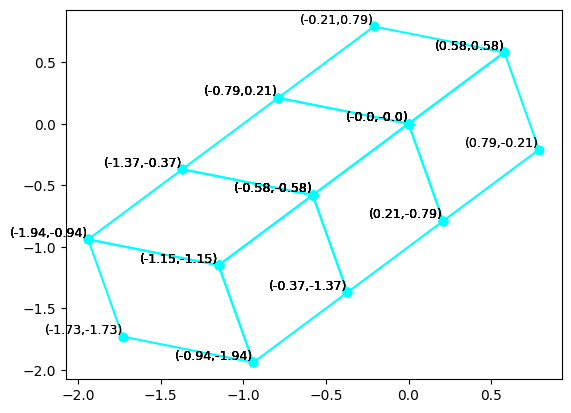

1
The folowing is a picture of[[0, 0, 0], [0, 0, 1], [0, 1, 0]]


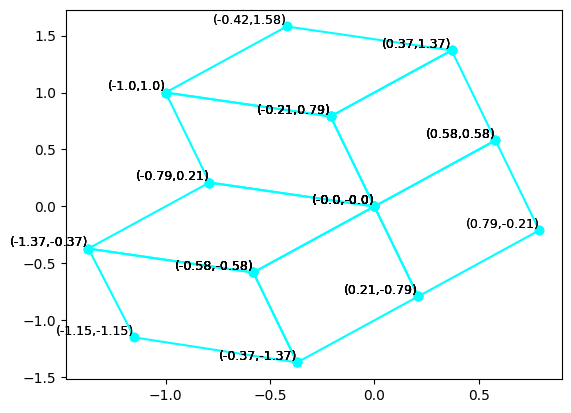

2
The folowing is a picture of[[0, 0, 0], [0, 0, 1], [1, 0, 0]]


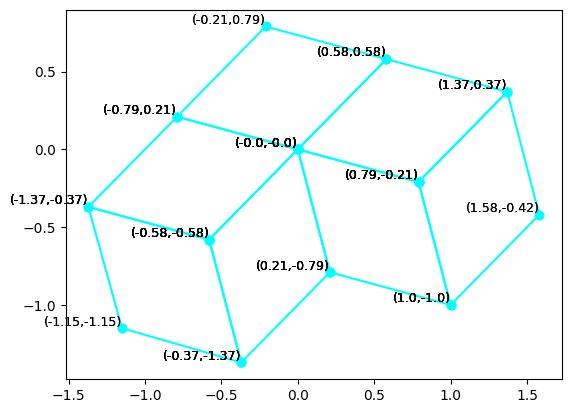

3
The folowing is a picture of[[0, 0, 0], [0, 1, 0], [0, 2, 0]]


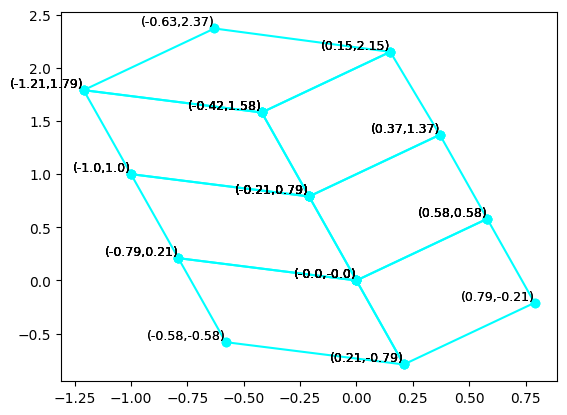

4
The folowing is a picture of[[0, 0, 0], [0, 1, 0], [1, 0, 0]]


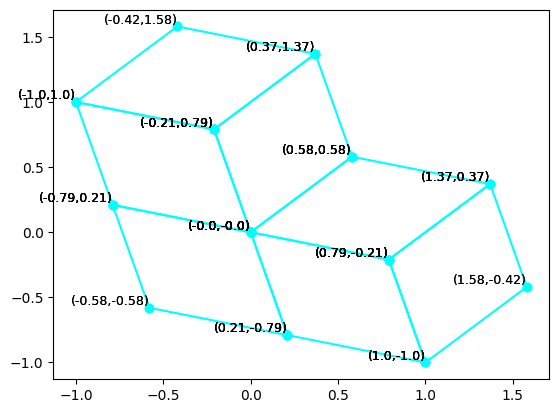

5
The folowing is a picture of[[0, 0, 0], [1, 0, 0], [2, 0, 0]]


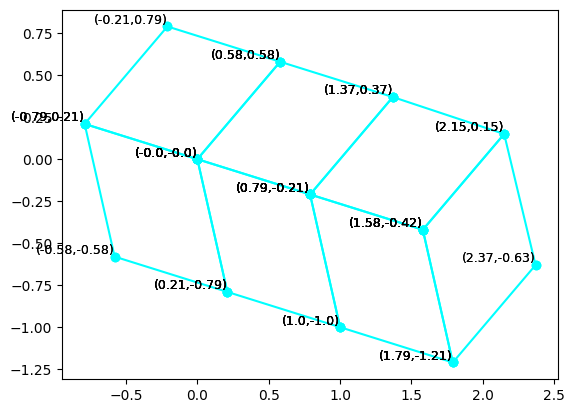

In [3]:
for i in range(len(master_pi[3])):
  print(i)
  print("The folowing is a picture of"+str(master_pi[3][i]))

#def prints_rhombi_of_given_partition(partition):
  fig, ax = plt.subplots()
  for box in master_pi[3][i]:
    a,b,c = box
    if [a,b,c+1] not in master_pi[3][i]:
      V1 = np.array([[a],[b],[c+1]])
      V2 = np.array([[a],[b+1],[c+1]])
      V3 = np.array([[a+1],[b],[c+1]])
      V4 = np.array([[a+1],[b+1],[c+1]])
      D1 = np.matmul(T, V1)
      D2 = np.matmul(T, V2)
      D3 = np.matmul(T, V3)
      D4 = np.matmul(T, V4)
      adds_segment(round(D1[0][0],2),round(D1[1][0],2),round(D2[0][0],2),round(D2[1][0],2))
      adds_segment(round(D1[0][0],2),round(D1[1][0],2),round(D3[0][0],2),round(D3[1][0],2))
      adds_segment(round(D2[0][0],2),round(D2[1][0],2),round(D4[0][0],2),round(D4[1][0],2))
      adds_segment(round(D3[0][0],2),round(D3[1][0],2),round(D4[0][0],2),round(D4[1][0],2))
    if [a,b+1,c] not in master_pi[3][i]:
      V1 = np.array([[a],[b+1],[c]])
      V2 = np.array([[a],[b+1],[c+1]])
      V3 = np.array([[a+1],[b+1],[c]])
      V4 = np.array([[a+1],[b+1],[c+1]])
      D1 = np.matmul(T, V1)
      D2 = np.matmul(T, V2)
      D3 = np.matmul(T, V3)
      D4 = np.matmul(T, V4)
      adds_segment(round(D1[0][0],2),round(D1[1][0],2),round(D2[0][0],2),round(D2[1][0],2))
      adds_segment(round(D1[0][0],2),round(D1[1][0],2),round(D3[0][0],2),round(D3[1][0],2))
      adds_segment(round(D2[0][0],2),round(D2[1][0],2),round(D4[0][0],2),round(D4[1][0],2))
      adds_segment(round(D3[0][0],2),round(D3[1][0],2),round(D4[0][0],2),round(D4[1][0],2))
    if [a+1, b, c] not in master_pi[3][i]:
      V1 = np.array([[a+1],[b],[c]])
      V2 = np.array([[a+1],[b],[c+1]])
      V3 = np.array([[a+1],[b+1],[c]])
      V4 = np.array([[a+1],[b+1],[c+1]])
      D1 = np.matmul(T, V1)
      D2 = np.matmul(T, V2)
      D3 = np.matmul(T, V3)
      D4 = np.matmul(T, V4)
      adds_segment(round(D1[0][0],2),round(D1[1][0],2),round(D2[0][0],2),round(D2[1][0],2))
      adds_segment(round(D1[0][0],2),round(D1[1][0],2),round(D3[0][0],2),round(D3[1][0],2))
      adds_segment(round(D2[0][0],2),round(D2[1][0],2),round(D4[0][0],2),round(D4[1][0],2))
      adds_segment(round(D3[0][0],2),round(D3[1][0],2),round(D4[0][0],2),round(D4[1][0],2))
  plt.show()